In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
repseq_dir = Path('/mnt/data2/planter_outputs/repseq')

def count_lines(file_path):
    with open(file_path, 'r') as file:
        return sum(1 for _ in file)

repseq_counts = {}
for updated_reps in repseq_dir.glob('*/updated_reps.txt'):
    repseq_counts[updated_reps.parent.name] = count_lines(updated_reps)

repseq_counts_df = pd.DataFrame(list(repseq_counts.items()), columns=['sample', 'repseq_count']).sort_values(by='repseq_count')
repseq_counts_df.head()

,sample,repseq_count
48,update_ERR9123871,16588
16,update_ERR9123872,17111
12,update_ERR9123874,17640
10,update_ERR9123875,18014
30,update_ERR9123876,18244


In [15]:
# Calculate the difference between rows
repseq_counts_df['diff'] = repseq_counts_df['repseq_count'].diff()
repseq_counts_df.head()


,sample,repseq_count,diff
48,update_ERR9123871,16588,NaN
16,update_ERR9123872,17111,523.0
12,update_ERR9123874,17640,529.0
10,update_ERR9123875,18014,374.0
30,update_ERR9123876,18244,230.0


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='repseq_count', ylabel='diff'>

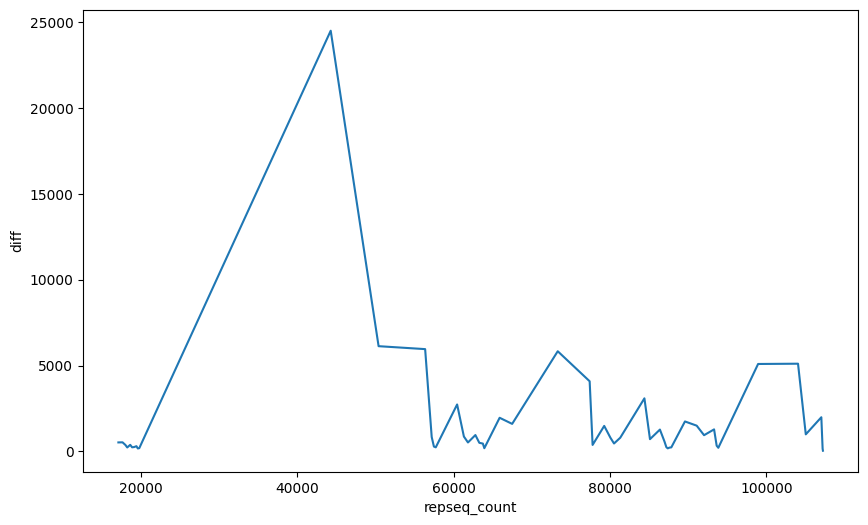

In [19]:
# Plot the repseq_count and diff
plt.figure(figsize=(10, 6))
sns.lineplot(x='repseq_count', y='diff', data=repseq_counts_df)
plt.show()
